In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv', encoding='ISO-8859-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
nan_values = df.isna()

any_missing_values = nan_values.any().any()

any_missing_values_in_column = nan_values.any()

missing_value_count = df.isnull().sum()

for column, has_missing in any_missing_values_in_column.items():
    if has_missing:
        count = missing_value_count[column]
        print(f"-----> Column '{column}' has {count} missing values.")
        
print("\nMissing Values in the Entire DataFrame?")
print(any_missing_values)

print("\nMissing Values in Each Column?")
print(any_missing_values_in_column)

print("\nMissing Value Counts in Each Column:")
print(missing_value_count)

-----> Column 'in_shazam_charts' has 50 missing values.
-----> Column 'key' has 95 missing values.

Missing Values in the Entire DataFrame?
True

Missing Values in Each Column?
track_name              False
artist(s)_name          False
artist_count            False
released_year           False
released_month          False
released_day            False
in_spotify_playlists    False
in_spotify_charts       False
streams                 False
in_apple_playlists      False
in_apple_charts         False
in_deezer_playlists     False
in_deezer_charts        False
in_shazam_charts         True
bpm                     False
key                      True
mode                    False
danceability_%          False
valence_%               False
energy_%                False
acousticness_%          False
instrumentalness_%      False
liveness_%              False
speechiness_%           False
dtype: bool

Missing Value Counts in Each Column:
track_name               0
artist(s)_name           0

In [5]:
df = df.dropna(subset=['key'])

In [6]:
df.dropna(inplace=True)

In [7]:
df['streams'].dtype

dtype('O')

In [8]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['streams'].dtype

dtype('float64')

In [9]:
track_name_to_id = {name: idx for idx, name in enumerate(df['track_name'].unique())}

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6


In [10]:
df['track_id'] = df['track_name'].map(track_name_to_id)
df.drop(columns=['track_name'], inplace=True)

In [11]:
voi_col = ['track_id', 'streams','bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
df_voi = df[voi_col]
df_voi.head()

,track_id,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0,141381703.0,125,B,Major,80,89,83,31,0,8,4
1,1,133716286.0,92,C#,Major,71,61,74,7,0,10,4
2,2,140003974.0,138,F,Major,51,32,53,17,0,31,6
3,3,800840817.0,170,A,Major,55,58,72,11,0,11,15
4,4,303236322.0,144,A,Minor,65,23,80,14,63,11,6


In [12]:
#label encoding or one hot encoding?
df_features = df_voi
df_features = pd.get_dummies(df_voi, columns=['key', 'mode'], prefix=['key', 'mode'])

In [13]:
df_features.head()

,track_id,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0,141381703.0,125,80,89,83,31,0,8,4,...,False,False,False,False,False,False,False,False,True,False
1,1,133716286.0,92,71,61,74,7,0,10,4,...,True,False,False,False,False,False,False,False,True,False
2,2,140003974.0,138,51,32,53,17,0,31,6,...,False,False,False,False,True,False,False,False,True,False
3,3,800840817.0,170,55,58,72,11,0,11,15,...,False,False,False,False,False,False,False,False,True,False
4,4,303236322.0,144,65,23,80,14,63,11,6,...,False,False,False,False,False,False,False,False,False,True


In [14]:
#rename columns of interests
re_col = {
    'danceability_%': 'danceability',
    'valence_%': 'valence',
    'energy_%': 'energy',
    'acousticness_%': 'acousticness',
    'instrumentalness_%': 'instrumentalness',
    'liveness_%': 'liveness',
    'speechiness_%': 'speechiness' 
}

df_features.rename(columns=re_col, inplace=True)
df_features.head()

,track_id,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0,141381703.0,125,80,89,83,31,0,8,4,...,False,False,False,False,False,False,False,False,True,False
1,1,133716286.0,92,71,61,74,7,0,10,4,...,True,False,False,False,False,False,False,False,True,False
2,2,140003974.0,138,51,32,53,17,0,31,6,...,False,False,False,False,True,False,False,False,True,False
3,3,800840817.0,170,55,58,72,11,0,11,15,...,False,False,False,False,False,False,False,False,True,False
4,4,303236322.0,144,65,23,80,14,63,11,6,...,False,False,False,False,False,False,False,False,False,True


# EDA

In [15]:
df_da = df_features.drop(columns=['track_id'])
df_da.head()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,141381703.0,125,80,89,83,31,0,8,4,False,...,False,False,False,False,False,False,False,False,True,False
1,133716286.0,92,71,61,74,7,0,10,4,False,...,True,False,False,False,False,False,False,False,True,False
2,140003974.0,138,51,32,53,17,0,31,6,False,...,False,False,False,False,True,False,False,False,True,False
3,800840817.0,170,55,58,72,11,0,11,15,True,...,False,False,False,False,False,False,False,False,True,False
4,303236322.0,144,65,23,80,14,63,11,6,True,...,False,False,False,False,False,False,False,False,False,True


In [16]:
df_da.describe()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
count,8.160000e+02,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,4.689858e+08,122.565483,67.391677,51.201958,64.362301,26.309670,1.676867,18.168911,10.526316
std,5.231267e+08,28.174803,14.688458,23.620978,16.107587,25.470972,8.767328,13.541996,10.219987
min,2.762000e+03,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.342848e+08,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,2.638368e+08,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,6.011986e+08,141.000000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,3.562544e+09,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [17]:
binary_columns = ['key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor']

for column in binary_columns:
    df_da[column] = df_da[column].astype(int) 

In [18]:
df_da.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 952
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   streams           816 non-null    float64
 1   bpm               817 non-null    int64  
 2   danceability      817 non-null    int64  
 3   valence           817 non-null    int64  
 4   energy            817 non-null    int64  
 5   acousticness      817 non-null    int64  
 6   instrumentalness  817 non-null    int64  
 7   liveness          817 non-null    int64  
 8   speechiness       817 non-null    int64  
 9   key_A             817 non-null    int64  
 10  key_A#            817 non-null    int64  
 11  key_B             817 non-null    int64  
 12  key_C#            817 non-null    int64  
 13  key_D             817 non-null    int64  
 14  key_D#            817 non-null    int64  
 15  key_E             817 non-null    int64  
 16  key_F             817 non-null    int64  
 17  ke

In [19]:
df_da.head()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,141381703.0,125,80,89,83,31,0,8,4,0,...,0,0,0,0,0,0,0,0,1,0
1,133716286.0,92,71,61,74,7,0,10,4,0,...,1,0,0,0,0,0,0,0,1,0
2,140003974.0,138,51,32,53,17,0,31,6,0,...,0,0,0,0,1,0,0,0,1,0
3,800840817.0,170,55,58,72,11,0,11,15,1,...,0,0,0,0,0,0,0,0,1,0
4,303236322.0,144,65,23,80,14,63,11,6,1,...,0,0,0,0,0,0,0,0,0,1


In [20]:
df_da.astype(float)
df_da.head()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,141381703.0,125,80,89,83,31,0,8,4,0,...,0,0,0,0,0,0,0,0,1,0
1,133716286.0,92,71,61,74,7,0,10,4,0,...,1,0,0,0,0,0,0,0,1,0
2,140003974.0,138,51,32,53,17,0,31,6,0,...,0,0,0,0,1,0,0,0,1,0
3,800840817.0,170,55,58,72,11,0,11,15,1,...,0,0,0,0,0,0,0,0,1,0
4,303236322.0,144,65,23,80,14,63,11,6,1,...,0,0,0,0,0,0,0,0,0,1


In [21]:
scaler = MinMaxScaler()

df_da['streams'] = scaler.fit_transform(df_da[['streams']])
print(df_da.head())

    streams  bpm  danceability  valence  energy  acousticness  \
0  0.039685  125            80       89      83            31   
1  0.037533   92            71       61      74             7   
2  0.039298  138            51       32      53            17   
3  0.224794  170            55       58      72            11   
4  0.085117  144            65       23      80            14   

   instrumentalness  liveness  speechiness  key_A  ...  key_C#  key_D  key_D#  \
0                 0         8            4      0  ...       0      0       0   
1                 0        10            4      0  ...       1      0       0   
2                 0        31            6      0  ...       0      0       0   
3                 0        11           15      1  ...       0      0       0   
4                63        11            6      1  ...       0      0       0   

   key_E  key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0      0      0       0      0       0           1       

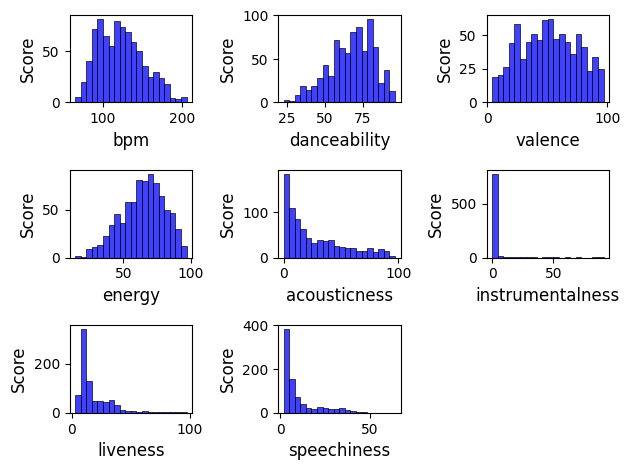

In [22]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_da, x=column, bins=20, color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Score", fontsize=12)

plt.tight_layout()
plt.show()

In [23]:
columns_to_correlate = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'streams']

correlation_matrix = df_da[columns_to_correlate].corr()
print(correlation_matrix)

                       bpm  danceability   valence    energy  acousticness  \
bpm               1.000000     -0.148174  0.029169  0.013363     -0.010767   
danceability     -0.148174      1.000000  0.389729  0.157970     -0.240454   
valence           0.029169      0.389729  1.000000  0.349736     -0.064072   
energy            0.013363      0.157970  0.349736  1.000000     -0.552637   
acousticness     -0.010767     -0.240454 -0.064072 -0.552637      1.000000   
instrumentalness -0.003407     -0.102144 -0.147032 -0.051662      0.046700   
liveness         -0.005817     -0.100579  0.000142  0.111240     -0.046112   
speechiness       0.038248      0.201189  0.035704 -0.026880     -0.017820   
streams          -0.025694     -0.093268 -0.051014 -0.036499     -0.005751   

                  instrumentalness  liveness  speechiness   streams  
bpm                      -0.003407 -0.005817     0.038248 -0.025694  
danceability             -0.102144 -0.100579     0.201189 -0.093268  
valence  

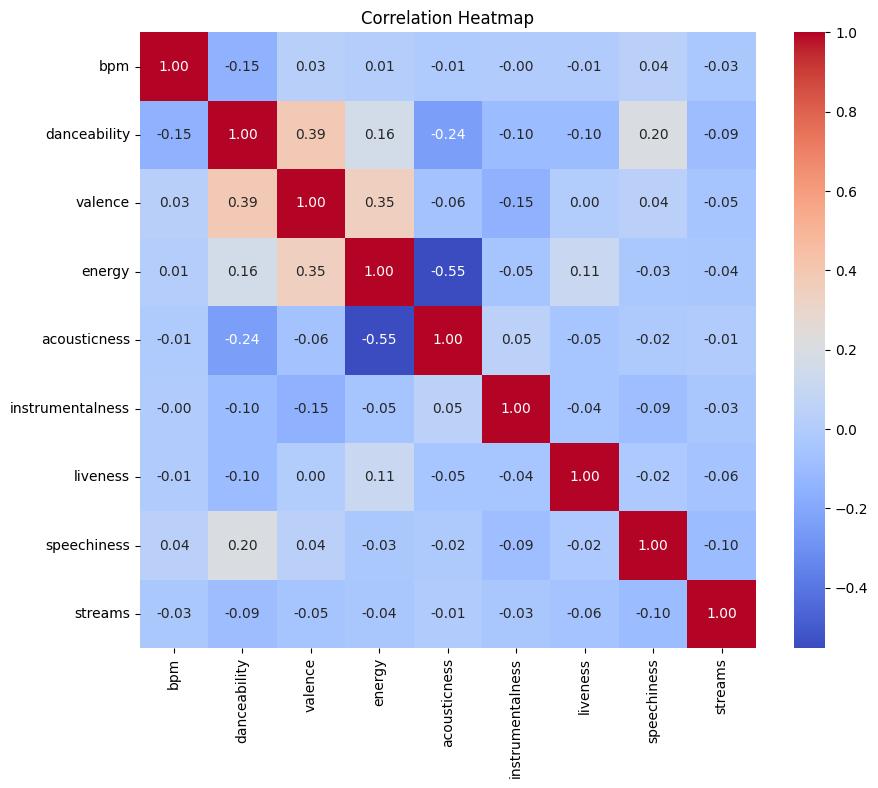

In [24]:
columns_to_correlate = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'streams']

correlation_matrix = df_da[columns_to_correlate].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Heatmap")
plt.show()

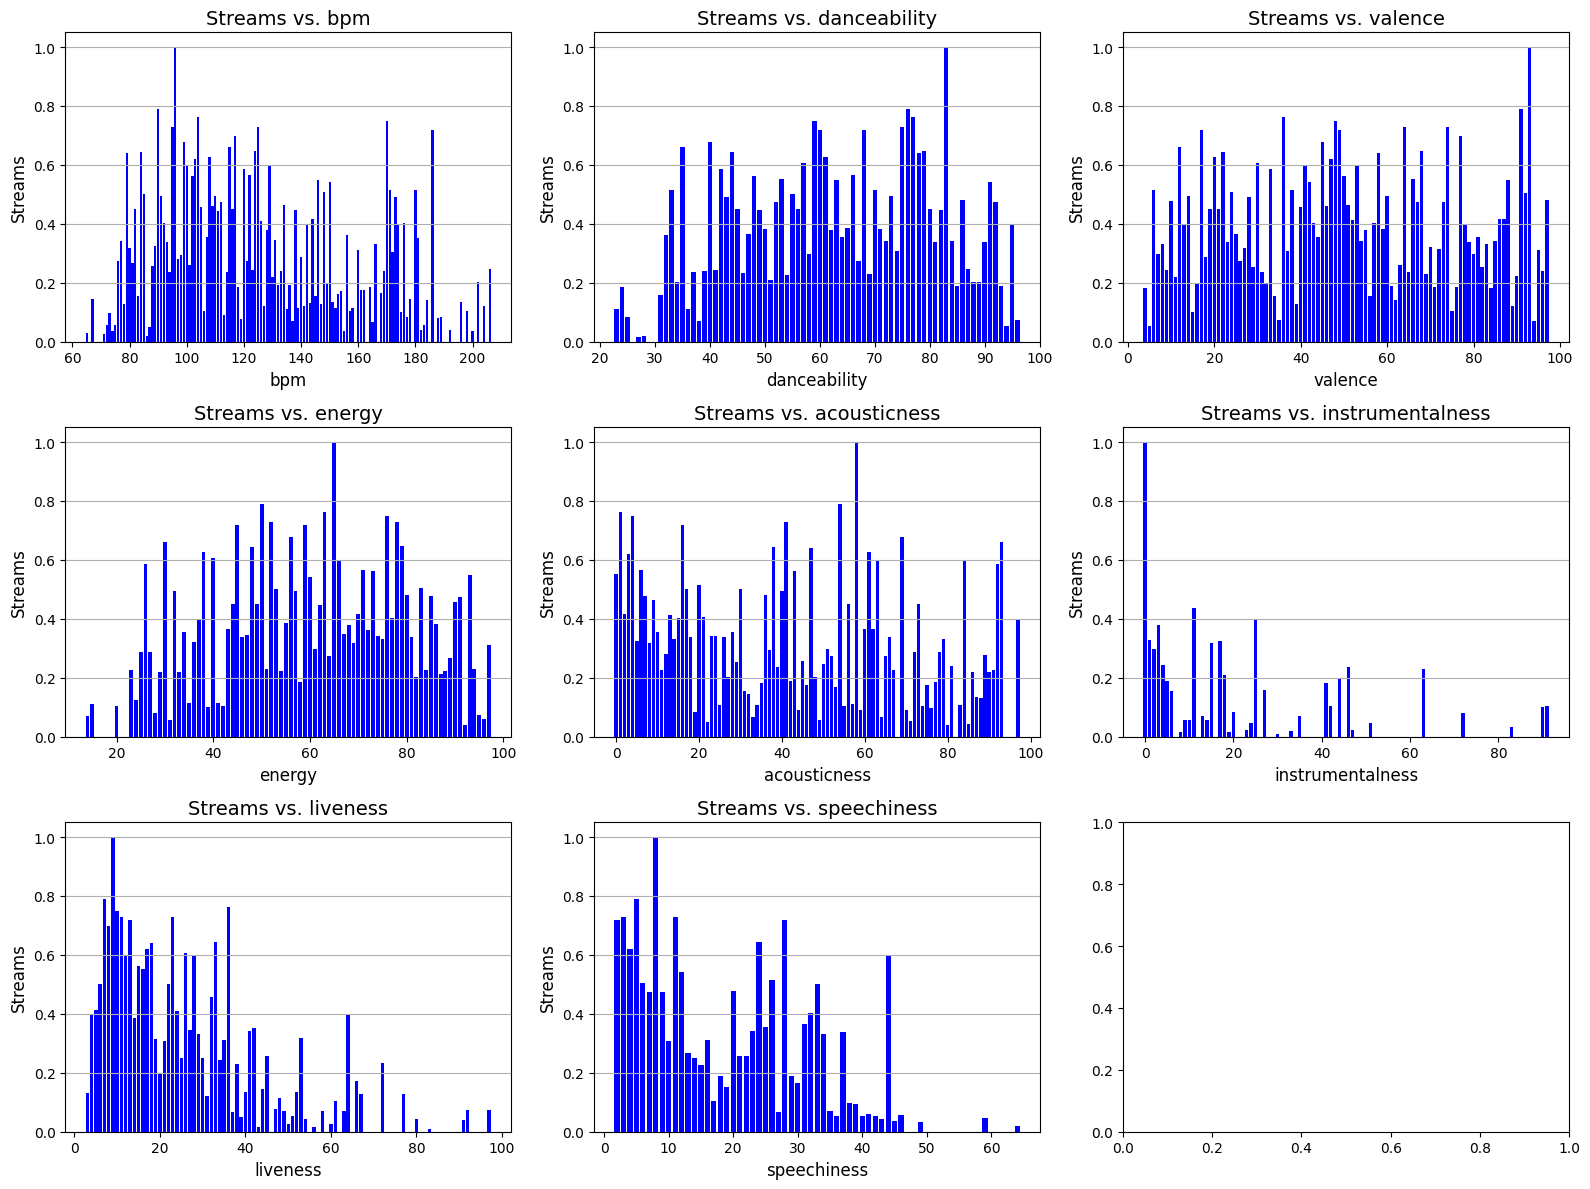

In [25]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    plt.bar(df_da[column], df_da['streams'], color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

/tmp/ipykernel_20/3109616005.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis')


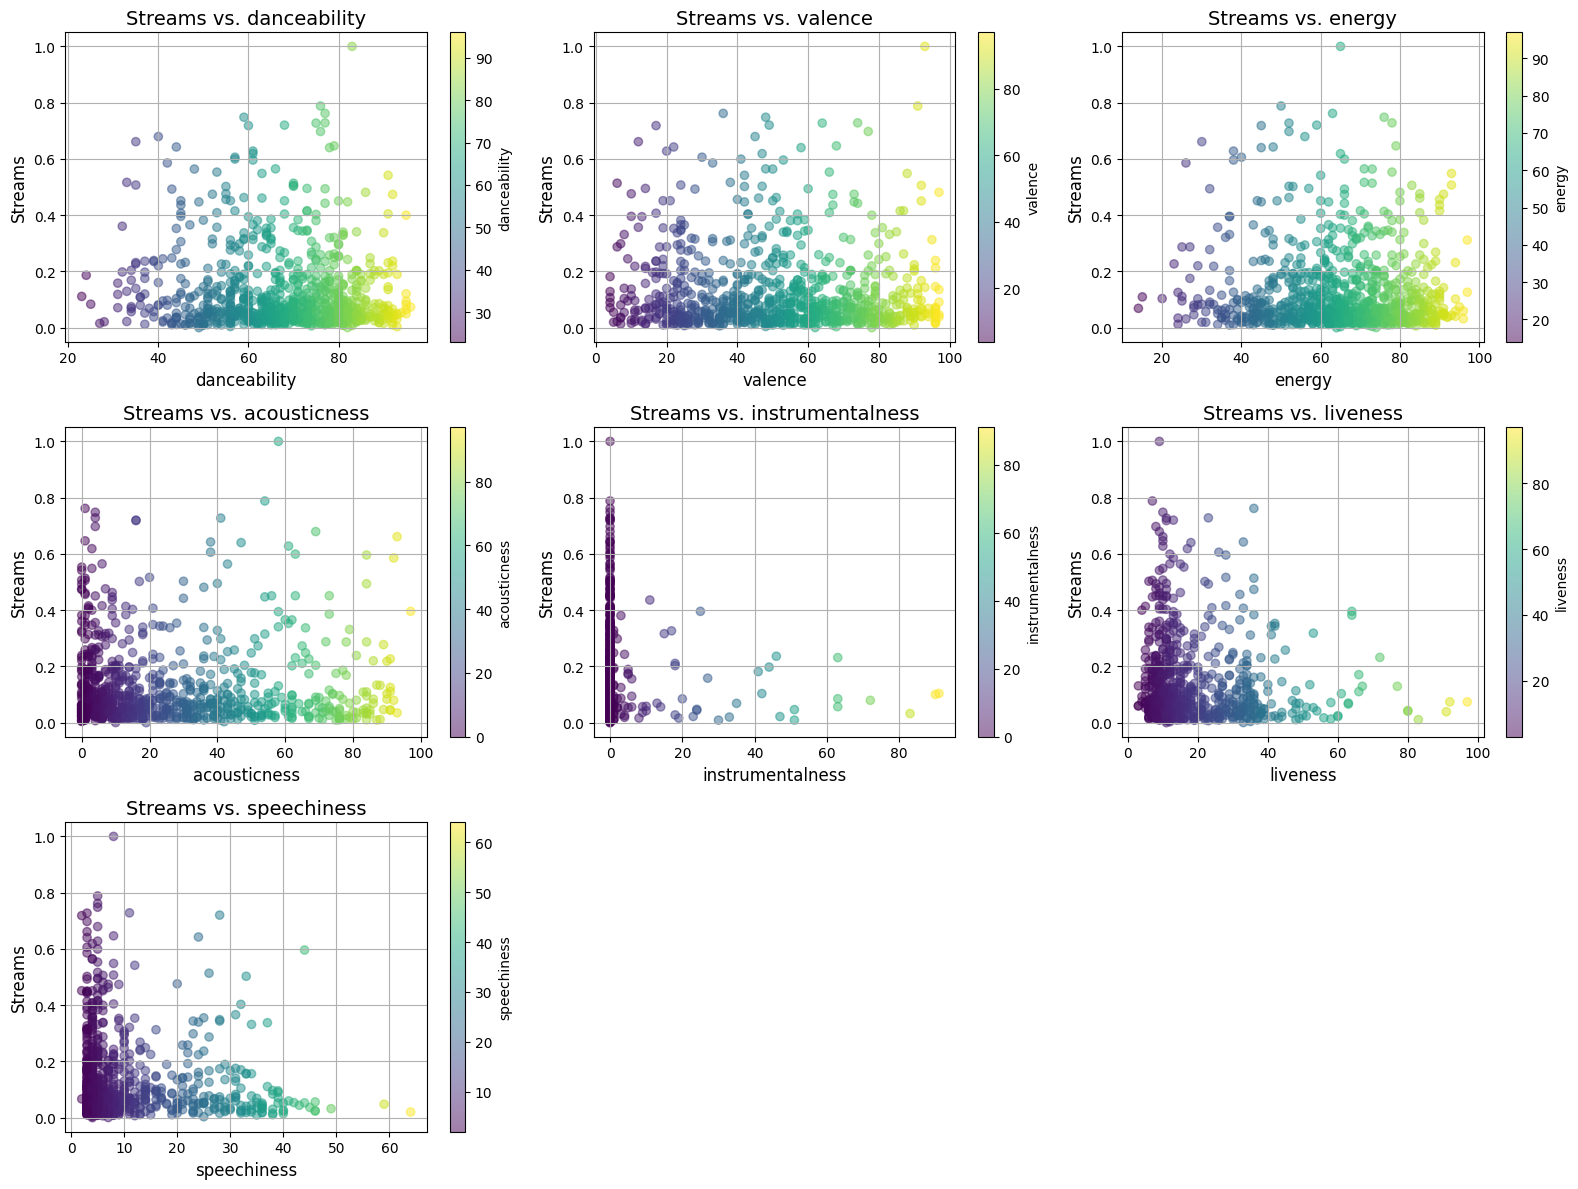

In [26]:
columns_to_plot = ['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()
colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    
    scatter = plt.scatter(df_da[column], df_da['streams'], c=df_da[column], cmap=colormap, alpha=0.5)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=column)

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show();

In [27]:
df_da = df_da.merge(df[['key']], left_index=True, right_index=True, how='inner')
df_da.head()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,...,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,key
0,0.039685,125,80,89,83,31,0,8,4,0,...,0,0,0,0,0,0,0,1,0,B
1,0.037533,92,71,61,74,7,0,10,4,0,...,0,0,0,0,0,0,0,1,0,C#
2,0.039298,138,51,32,53,17,0,31,6,0,...,0,0,0,1,0,0,0,1,0,F
3,0.224794,170,55,58,72,11,0,11,15,1,...,0,0,0,0,0,0,0,1,0,A
4,0.085117,144,65,23,80,14,63,11,6,1,...,0,0,0,0,0,0,0,0,1,A


/tmp/ipykernel_20/3011734127.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(y="key", x="streams", data=df_da, aspect=2, palette=palette)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


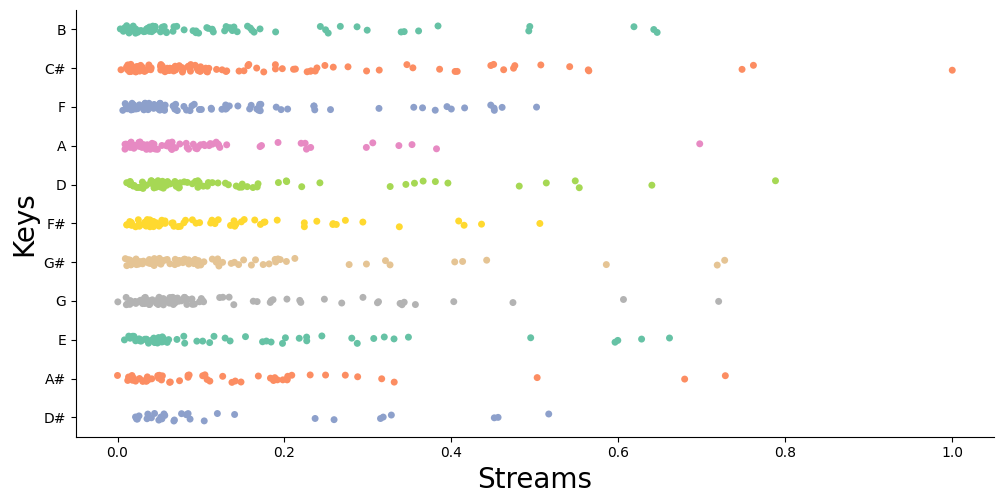

In [28]:
palette = sns.color_palette("Set2", len(df_da['key'].unique()))

sns.catplot(y="key", x="streams", data=df_da, aspect=2, palette=palette)
plt.xlabel("Streams", fontsize=20)
plt.ylabel("Keys", fontsize=20)
plt.show();

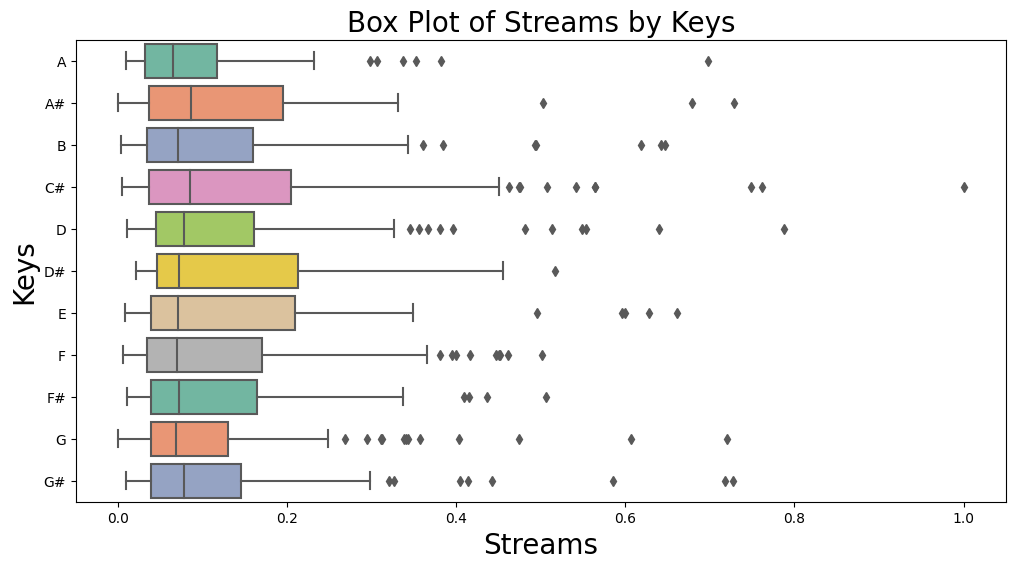

In [29]:
palette = sns.color_palette("Set2", len(df_da['key'].unique()))

sorted_keys = sorted(df_da['key'].unique())
plt.figure(figsize=(12, 6))
sns.boxplot(y="key", x="streams", data=df_da, order=sorted_keys, palette=palette)
plt.xlabel("Streams", fontsize=20)
plt.ylabel("Keys", fontsize=20)
plt.title("Box Plot of Streams by Keys", fontsize=20)
plt.show()

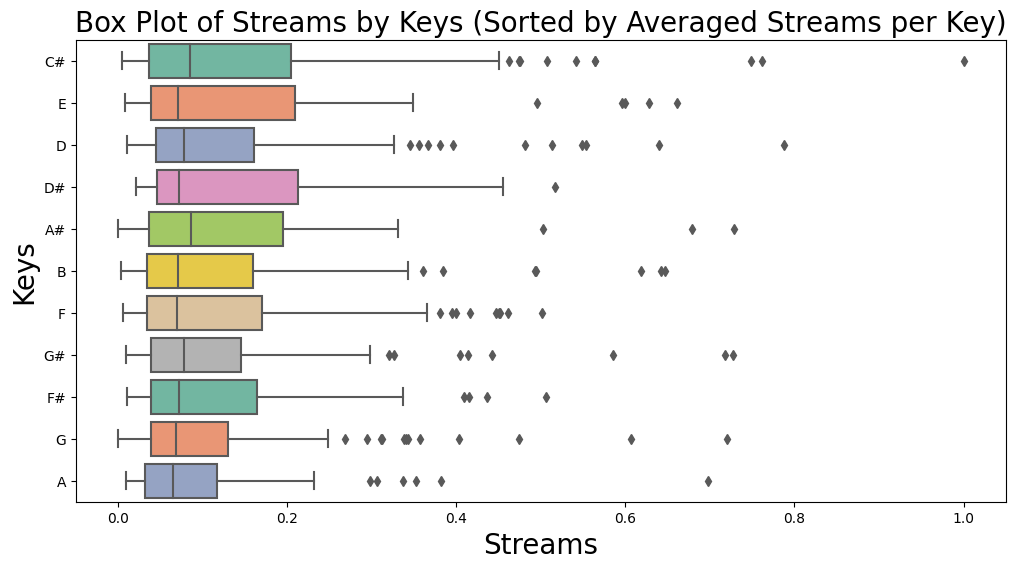

In [30]:
average_streams = df_da.groupby('key')['streams'].mean().sort_values(ascending=False).index.tolist()

palette = sns.color_palette("Set2", len(average_streams))

plt.figure(figsize=(12, 6))
sns.boxplot(y="key", x="streams", data=df_da, order=average_streams, palette=palette)
plt.xlabel("Streams", fontsize=20)
plt.ylabel("Keys", fontsize=20)
plt.title("Box Plot of Streams by Keys (Sorted by Averaged Streams per Key)", fontsize=20)
plt.show()

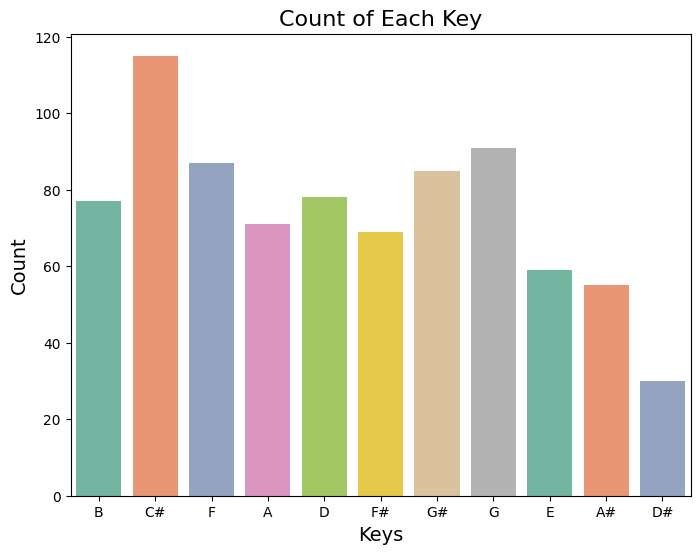

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x="key", data=df_da, palette="Set2")
plt.xlabel("Keys", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Count of Each Key", fontsize=16)
plt.show()

In [32]:
key_counts = df_da['key'].value_counts().reset_index()
key_counts.columns = ['Key', 'Count']

total_count_key = key_counts['Count'].sum()
total_row = pd.DataFrame({'Key': ['Total'], 'Count': [total_count_key]})
key_counts = pd.concat([key_counts, total_row])

#------------------------

total_counts = df_da['key'].count()

is_equal = total_counts == key_counts[key_counts['Key'] == 'Total']['Count'].values[0]
print("Is total_count equal to 'Total'Key? ", is_equal)

print("Total count of values in the 'key' column:", total_counts)
print(key_counts)

Is total_count equal to 'Total'Key?  True
Total count of values in the 'key' column: 817
      Key  Count
0      C#    115
1       G     91
2       F     87
3      G#     85
4       D     78
5       B     77
6       A     71
7      F#     69
8       E     59
9      A#     55
10     D#     30
0   Total    817
